## Group 2 / Component B
# Introduction
The objective for the assignment is to explore solutions to solve business intelligence and data mining problems. 

The project is split into 5 sections which each represent a separate objective. The objectives are as followed:
1. __subtask1__: Data exploration, pre-processing, and visualization.
2. __subtask2__: Customer behaviour analysis. Customer Segmentation. 
3. __subtask3__: Build a shopping recommender system. 
4. __subtask4__: Evaluate the recommender system.
5. __subtask5__: Investigate the impact of the recommender system on impulse buying. 

Through the completion of each section, we will be able to sucessfully complete the learning outcomes of the module. The learning outcomes are as followed:
1. Investigate how data mining / machine learning is applied in a real-world business intelligence scenario.
2. Apply the concepts of machine learning and data mining in business intelligence applications and evaluate their effectiveness.
3. Critically evaluate ethical, security and privacy-related considerations in business intelligence applications.

Although there are 5 tasks, our main goal is to complete the 4 required tasks to our best ability. The tasks we aim to complete will be hopefully be enough to satisfy the module learning outcomes.  



# Dataset (Retail Rocket)
The dataset used to complete the assignment is "Retailrocket recommender system dataset" available from Kaggle. https://www.kaggle.com/datasets/retailrocket/ecommerce-dataset

The dataset consists of three files: a file with behaviour data (events.csv), a file with item properties (itemproperties.сsv) and a file, which describes category tree (categorytree.сsv). The data has been collected from a real-world ecommerce website. It is raw data, i.e. without any content transformations, however, all values are hashed due to confidential issues (Retailrocket, 2017).

# Methods 
## subtask1: Data exploration, pre-processing, and visualization.
- Check for missing values and noise.
- Check if there’s a TIMESTAMP data type that needs to be handled.
- Check for categorical data.
- Check if feature scaling is needed.
- Plot graphs or charts (or using other visualization techniques) to discover patterns.
- Check if other pre-processing steps are needed.

## subtask2: Customer behaviour analysis. Customer Segmentation.

## subtask3: Build a shopping recommender system.

## subtask4: Evaluate the recommender system.

## subtask5: Investigate the impact of the recommender system on impulse buying.

In [3]:
# Import necessary libraries 
import numpy as np
import pandas as pd
import datetime 
import time

%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
# Defining datasets  
events = pd.read_csv('data/events.csv')
category_tree = pd.read_csv('data/category_tree.csv')
item_properties_1 = pd.read_csv('data/item_properties_part1.csv')
item_properties_2 = pd.read_csv('data/item_properties_part2.csv')

# Subtask 1: Data exploration, pre-processing, and visualization. 
To understand each dataset in as much detail as possible, each dataframe is individually explored, pre-processed, and visualized.

On a predictive modelling project, such as classification or regression, raw data typically cannot be used directly. This is because of reasons such as:

- Some machine learning algorithms impose requirements on the data.
- Machine learning algorithms require data to be numbers.
- Statistical noise and errors in the data may need to be corrected.
- Complex non-linear relationships may be teased out of the data.

As such, the raw data must be pre-processed prior to being used to fit and evaluate a machine learning model. This step in a predictive modeling project is referred to as data preparation, although it goes by many other names, such as data wrangling, data cleaning, data pre-processing and feature engineering. We can define data preparation as the transformation of raw data into a form that is more suitable for modeling (Brownlee, 2020).

# "events" dataset

## Data exploration
- Understanding the "events" dataset 
- Cleaning data - missing values 
- Acknowledging categorical data

In [3]:
events.head()

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN


- __timestamp__ = data and time at the moment of a customer completing an action // needs converting from UNIX

- __visitorid__ =  unique to each user 

- __event__ = action of the user // need to expand to see other actions 

- __transactionid__ = corresponding to if the user has made a purchase or not // need to prove: a value = purchase & NaN = remaining actions

In [6]:
events[events.transactionid.notnull()].event.unique()


array(['transaction'], dtype=object)

In [7]:
events[events.transactionid.isnull()].event.unique()


array(['view', 'addtocart'], dtype=object)

- __transactionid__ = if there is a value, it means the user has made a purchase, if not then it means the user was either viewing or addded to cart

In [8]:
# Looking for categorical data
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2756101 entries, 0 to 2756100
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   timestamp      int64  
 1   visitorid      int64  
 2   event          object 
 3   itemid         int64  
 4   transactionid  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 105.1+ MB


Evidence of __categorial data__ under the "events" column 

In [9]:
# Displaying the categories of "event" 
events["event"].value_counts()

view           2664312
addtocart        69332
transaction      22457
Name: event, dtype: int64

Event categories: The user can either view an item, add an item to their shopping cart, or complete a transaction

In [10]:
# Checking for missing data
events.isnull().sum()

timestamp              0
visitorid              0
event                  0
itemid                 0
transactionid    2733644
dtype: int64

There are 2733644 counts of null data. However, as discussed, missing data under "transactionid" means the user is either viewing or adding to cart. 

It is therefore unnecessary to remove null values.

## Data pre-processing
- Convert timestamp from UNIX to date & time to make the data easier to understand // possibly be used later to work out customer purchasing patterns 
- Seperate the events into 3 different dataframes addtocart, view and transaction

In [11]:
events.timestamp = events.timestamp.apply(lambda x: datetime.datetime.fromtimestamp(x//1000.0) )

In [12]:
events.head()

,timestamp,visitorid,event,itemid,transactionid
0,2015-06-02 06:02:12,257597,view,355908,NaN
1,2015-06-02 06:50:14,992329,view,248676,NaN
2,2015-06-02 06:13:19,111016,view,318965,NaN
3,2015-06-02 06:12:35,483717,view,253185,NaN
4,2015-06-02 06:02:17,951259,view,367447,NaN


"timestamp" has now been converted from LINUX 

In [13]:
# Separating events into three categories: transaction, addtocart, and view
# These will be used for customer behaviour analysis

# All transactions 
transaction = events[events['event'] == 'transaction']
transaction = transaction.drop(['event'], axis = 1)
transaction.head()

,timestamp,visitorid,itemid,transactionid
130,2015-06-02 06:17:56,599528,356475,4000.0
304,2015-06-01 22:18:20,121688,15335,11117.0
418,2015-06-01 22:25:15,552148,81345,5444.0
814,2015-06-01 17:38:56,102019,150318,13556.0
843,2015-06-01 17:01:58,189384,310791,7244.0


In [14]:
# All items added to cart
addtocart = events[events['event'] == 'addtocart']
addtocart = addtocart.drop(['transactionid','event'], axis = 1)
addtocart.head()

,timestamp,visitorid,itemid
17,2015-06-02 06:33:56,287857,5206
19,2015-06-02 05:57:58,158090,10572
63,2015-06-02 06:39:03,1193904,255275
112,2015-06-02 06:12:21,599528,356475
179,2015-06-02 05:54:40,105775,312728


In [15]:
# All items that were viewed
view = events[events['event'] == 'view']
view = view.drop(['transactionid','event'], axis = 1)
view.head()

,timestamp,visitorid,itemid
0,2015-06-02 06:02:12,257597,355908
1,2015-06-02 06:50:14,992329,248676
2,2015-06-02 06:13:19,111016,318965
3,2015-06-02 06:12:35,483717,253185
4,2015-06-02 06:02:17,951259,367447


The "event" dataset has now been separated into the three individual events.

Transactionid ws removed from addtocart and view as they are not needed.

Event was removed from all new tables as they are also not needed.

## Data visualization

Visualization is a central part of exploratory data analysis. Data analysts use visualization to examine, scrutinize, and validate their analysis before they report their findings (Johnson and Myatt, 2009). 

The aim is to further understand the datasets, correlations and distributions

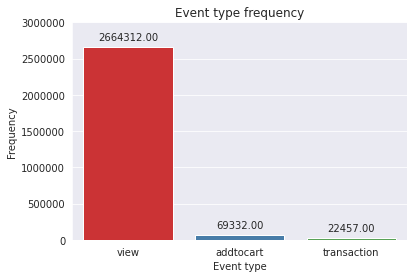

In [16]:
# Styles
sns.set_style('darkgrid')

# Barplot 
group_df = pd.DataFrame(events['event'].value_counts())
splot = sns.barplot(x=group_df.index, y=group_df['event'], data= group_df, palette="Set1")
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel("Event type")
plt.ylabel("Frequency")
plt.ylim(0,3e6)
plt.title("Event type frequency")
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

From the barplot, it is evident that users of the website spend most of the time viewing ("view") an item. 

This information could be useful later in order to imoprove their business.

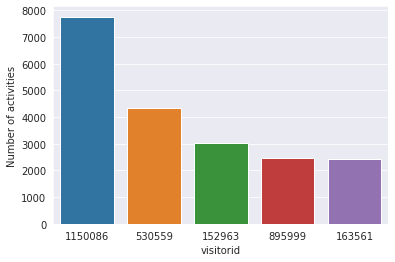

In [17]:
# Grouping event dataset by visitorid and event 
# Top 5 customers that visited the website
count_uid = events.groupby('visitorid')[['event']].count().sort_values(by='event', ascending=False)

df = pd.DataFrame({"visitorid":count_uid[:5].index, "num_activity":count_uid[:5].values[:,0]})

sns.barplot(x='visitorid', y='num_activity', data=df, order=df.sort_values('num_activity', ascending = False).visitorid)
plt.xlabel("visitorid")
plt.ylabel("Number of activities")
plt.show()

This bar plot is helpful in understanding the the activity of the top 5 visitors.

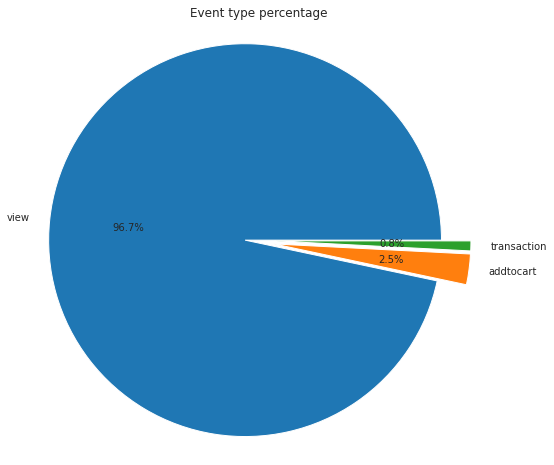

In [18]:
data = events.event.value_counts()
labels = data.index
sizes = data.values
explode = (0, 0.15, 0.15)  
plt.subplots(figsize=(8,8))
plt.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%', shadow=False, startangle=0)
plt.title("Event type percentage")
 
plt.axis('equal')
plt.show()

The pie chart further shows a visualization of the event categories.

The "view" event accumalates 96.7% of the actions, whilst "transaction" amounts to 0.8%, and "addtocart" the remaining 2.5%. 

This means that the total purchased items are not that many.

# "category_tree" dataset

## Data exploration
- Understanding the "category_tree" dataset 
- Cleaning data - missing values 
- Acknowledging categorical data

In [19]:
category_tree.head()

,categoryid,parentid
0,1016,213.0
1,809,169.0
2,570,9.0
3,1691,885.0
4,536,1691.0


- categoryid is the relationship of different products with one another. "categoryid" is a child to "parentid"

In [20]:
category_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1669 entries, 0 to 1668
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   categoryid  1669 non-null   int64  
 1   parentid    1644 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 26.2 KB


In [21]:
# Checking for null data
category_tree.isnull().sum()

categoryid     0
parentid      25
dtype: int64

There are 25 missing values within "parentid". As these are linked to categoryid, it is not advised to remove these values or make up replacement data.

## Data pre-processing
- potentially combine with itemid - itemid|categoryid|parentid - item_category new df?



## Data visualization
- Not needed for "category_tree" dataset

# "item_properties" dataset

## Data exploration
- Understanding the "item_properties" dataset 
- Cleaning data - missing values 
- Acknowledging categorical data

In [22]:
item_properties_1.head()

,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513


In [23]:
item_properties_2.head()

,timestamp,itemid,property,value
0,1433041200000,183478,561,769062
1,1439694000000,132256,976,n26.400 1135780
2,1435460400000,420307,921,1149317 1257525
3,1431831600000,403324,917,1204143
4,1435460400000,230701,521,769062


In [24]:
item_properties_2["property"].value_counts()

888           1370581
790            819716
available      686252
categoryid     361909
6              288264
               ...   
634                 1
472                 1
530                 1
703                 1
769                 1
Name: property, Length: 1094, dtype: int64

- __timestamp__ = data and time at the moment of a customer completing an action // needs converting from UNIX

- __itemid__ = unique item identifier

- __property__ = item attributes - categoryid, available

- __Value__ is the item's property value e.g. availability is 1 if there is stock and 0 otherwise

All values in the “item_properties.csv” file excluding "categoryid" and "available" properties were hashed. Value of the "categoryid" property contains item category identifier. Value of the "available" property contains availability of the item, i.e. 1 means the item was available, otherwise 0. All numerical values were marked with "n" char at the beginning, and have 3 digits precision after decimal point, e.g., "5" will become "n5.000", "-3.67584" will become "n-3.675". All words in text values were normalized (stemming procedure: https://en.wikipedia.org/wiki/Stemming) and hashed, numbers were processed as above, e.g. text "Hello world 2017!" will become "24214 44214 n2017.000"

In [25]:
# Checking for categorical data
item_properties_1.info()
item_properties_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999999 entries, 0 to 10999998
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   timestamp  int64 
 1   itemid     int64 
 2   property   object
 3   value      object
dtypes: int64(2), object(2)
memory usage: 335.7+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9275903 entries, 0 to 9275902
Data columns (total 4 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   timestamp  int64 
 1   itemid     int64 
 2   property   object
 3   value      object
dtypes: int64(2), object(2)
memory usage: 283.1+ MB


Both "item_properties" do contain categorical data, within "property" and "value"

In [26]:
# Checking for missing data
item_properties_1.isnull().sum()

timestamp    0
itemid       0
property     0
value        0
dtype: int64

In [27]:
item_properties_2.isnull().sum()

timestamp    0
itemid       0
property     0
value        0
dtype: int64

There is no missing data, it is therefore unnessesary to fix the datasets

## Data pre-processing
- Combine both item_properties.
- Convert timestamp from UNIX to date & time to make the data easier to understand // possibly be used later to work out customer purchasing patterns.

In [28]:
# Combining item_properties_1 & item_properties_2
properties=pd.concat([item_properties_1,item_properties_2])
properties.head()

,timestamp,itemid,property,value
0,1435460400000,460429,categoryid,1338
1,1441508400000,206783,888,1116713 960601 n277.200
2,1439089200000,395014,400,n552.000 639502 n720.000 424566
3,1431226800000,59481,790,n15360.000
4,1431831600000,156781,917,828513


In [29]:
properties.timestamp = properties.timestamp.apply(lambda x: datetime.datetime.fromtimestamp(x//1000.0) )

In [30]:
properties.head()

,timestamp,itemid,property,value
0,2015-06-28 04:00:00,460429,categoryid,1338
1,2015-09-06 04:00:00,206783,888,1116713 960601 n277.200
2,2015-08-09 04:00:00,395014,400,n552.000 639502 n720.000 424566
3,2015-05-10 04:00:00,59481,790,n15360.000
4,2015-05-17 04:00:00,156781,917,828513


Now that the both properties dataset are combined. We can now do some grouping with events.

In [31]:
# Removing the hidden values in "property"
properties = properties.loc[properties.property.isin(['categoryid', 'available']), :]
# Creating two new tables and dropping duplicate values 
categoryid = properties[properties.property=='categoryid'].drop_duplicates('itemid', keep='first')
itemid_categoryid = categoryid[['itemid', 'value']]
itemid_categoryid.columns = ['itemid', 'categoryid']

In [32]:
itemid_categoryid.head()

,itemid,categoryid
0,460429,1338
140,281245,1277
151,35575,1059
189,8313,1147
197,55102,47


itemid is now merged with categoryid, which also means its linked to parentid as it is a child of categoryid.

We can now also combine category_tree with itemid_categoryid to view the relationships between all the attributes (itemid, categoryid, and parentid)

In [33]:
categorydata = category_tree.dropna()
category_parent_dict = categorydata.set_index('categoryid').T.to_dict('list')
pd.options.mode.chained_assignment = None
itemid_categoryid['parentid'] = itemid_categoryid.categoryid.apply(lambda x: int(category_parent_dict.get(int(x), [x])[0]))


In [34]:
itemid_categoryid.head()

,itemid,categoryid,parentid
0,460429,1338,1278
140,281245,1277,312
151,35575,1059,1696
189,8313,1147,1027
197,55102,47,381


This new table will be useful in the recommendation system.

## Data visualization
- Not needed for "properties" dataset.

# Subtask 2: Customer behaviour analysis. Customer Segmentation. 


 ## Customer behaviour analysis
 
 “Understanding customer behaviour is crucial in business endeavours, as it can help businesses satisfy consumer expectations. Customer behaviour can cause a company to succeed or fail. Thus, insight into customer behaviour can be useful in developing a company’s marketing and operation strategy for satisfying customer requirements. Additionally, identifying customer behaviours plays a significant role in understanding factors that cause customers to buy a particular product.” (Apichottanakul, 2021)
 
 - Visual representation of buying patterns
 - Behavioural analyis based of time, to compare the dataset with online shopping trends found online.
 - Hourly and daily

In [35]:
events.head()

,timestamp,visitorid,event,itemid,transactionid
0,2015-06-02 06:02:12,257597,view,355908,NaN
1,2015-06-02 06:50:14,992329,view,248676,NaN
2,2015-06-02 06:13:19,111016,view,318965,NaN
3,2015-06-02 06:12:35,483717,view,253185,NaN
4,2015-06-02 06:02:17,951259,view,367447,NaN


In [44]:
events['dayofweek']=events.timestamp.dt.dayofweek

In [41]:
events.groupby('dayofweek').count()

,timestamp,visitorid,event,itemid,transactionid,hour,week,date_time
dayofweek,,,,,,,,
0,434497,434497,434497,434497,3746,434497,434497,434497
1,447335,447335,447335,447335,3952,447335,447335,447335
2,432664,432664,432664,432664,4161,432664,432664,432664
3,419621,419621,419621,419621,3835,419621,419621,419621
4,384223,384223,384223,384223,2947,384223,384223,384223
5,306763,306763,306763,306763,1852,306763,306763,306763
6,330998,330998,330998,330998,1964,330998,330998,330998


By creating a new column, we can sort the data by each day of the week 

In [45]:
events['hour']=events.timestamp.dt.hour
events['week']=events.timestamp.dt.isocalendar().week

Similarly, we do the same with hour and week

## Day of the week analysis

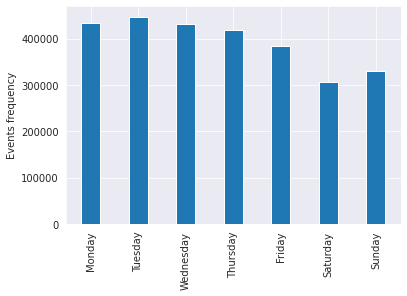

In [67]:
plt.hist(events['dayofweek'], bins, rwidth=0.4)
plt.ylabel('Events frequency')
plt.xticks(np.arange(7),['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], rotation=90)
bins = np.arange(8) - 0.5

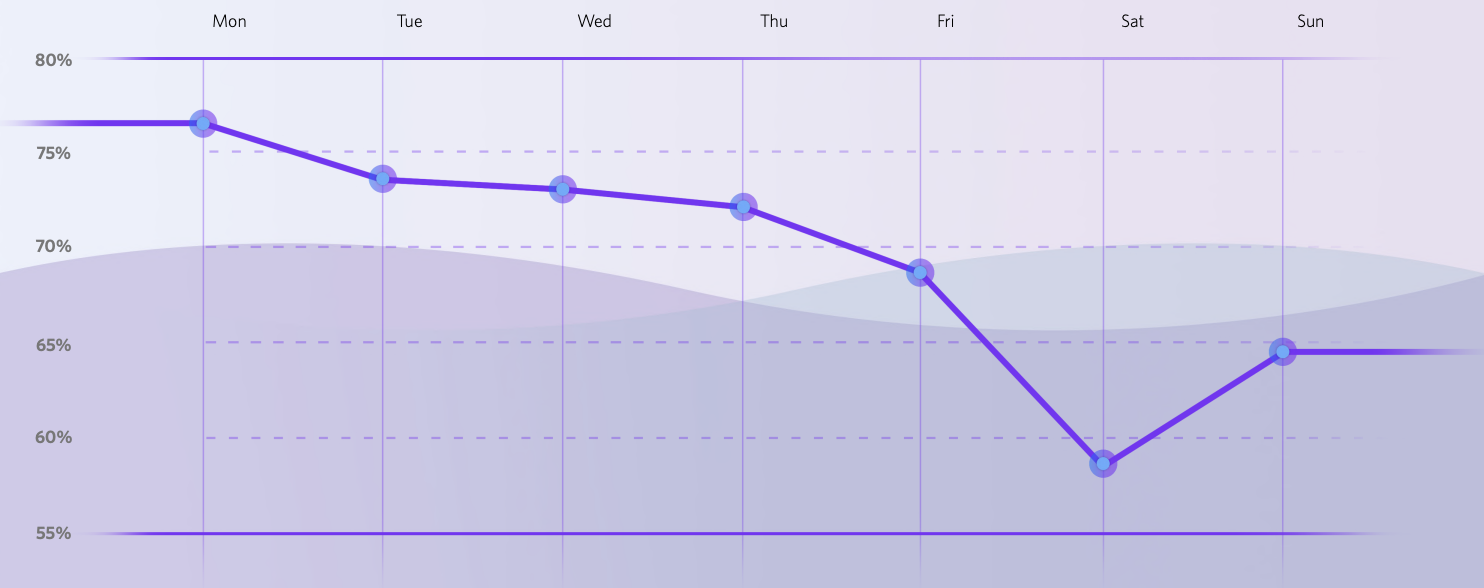

Compared with online retail trends (SaleCycle, 2022), RetailRocket shares similar customer behaviour in relation to the day of the week. 

RetailRocket's highest volume day is Monday, and lowest being Saturday. This is also the case for the retail stats and trends report. 

We can conclude that RetailRocket does show some similarities with traditional shopping trends.

## Hourly analysis

Text(0, 0.5, 'Events frequency')

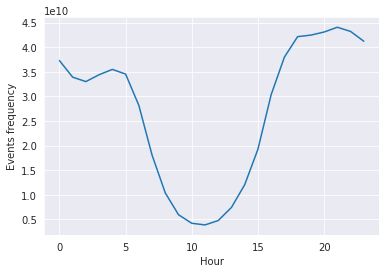

In [68]:
plt.plot(events[['hour','itemid']].groupby('hour').sum())
plt.xlabel('Hour')
plt.ylabel('Events frequency')

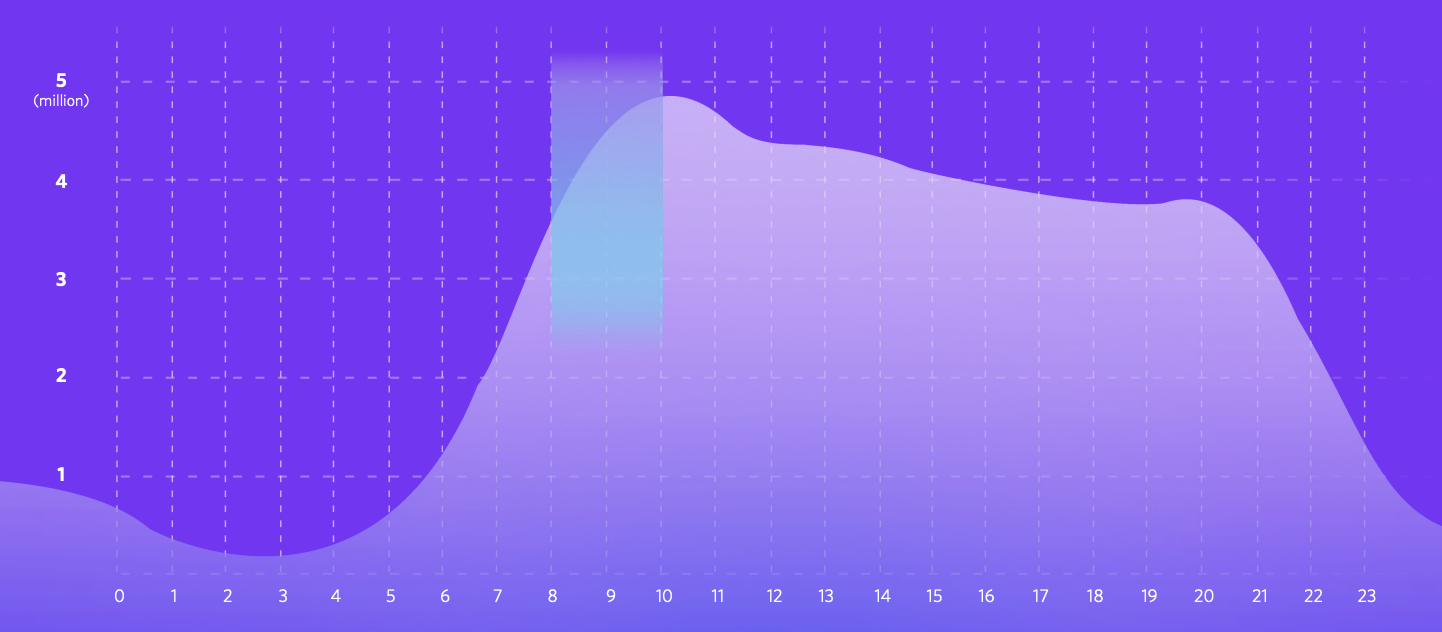

Compared to the online trends report (SaleCycle, 2022), we can see that there is no correlation. In fact, it seems that the data is opposite.

RetailRocket dataset has high activity up intil 5am. On the other hand, the online trend report shows there is hardly any activity until 5am.

RetailRocket has highest volume around 21:00, compared to the online reports highest being around 10:30.

RetailRocket does not follow regular hourly shopping patterns and trends

## Pairplot analysis

In [69]:
all_customers = events['visitorid'].unique()
print("Unique customers:", all_customers.size)
print('Total customers:', events['visitorid'].size)

Unique customers: 1407580
Total customers: 2756101


In [75]:
# Unique customers who purchased something
purchased_customers = events[events.transactionid.notnull()].visitorid.unique()
purchased_customers.size

11719

In [76]:
view_customers = list([x for x in all_customers if x not in purchased_customers])

In [77]:
def create_dataframe(visitor): 
    visitor_df_array = []

    for x in visitor:

        v_df = events[events.visitorid == x]
        temp = []
        temp.append(x)
        temp.append(v_df[v_df.event == 'view'].itemid.unique().size)
        temp.append(v_df[v_df.event == 'view'].event.count())
        number_of_items_bought = v_df[v_df.event == 'transaction'].event.count()
        temp.append(number_of_items_bought)
       
        if(number_of_items_bought == 0):
            temp.append(0)
        else:
            temp.append(1)
        visitor_df_array.append(temp)
    return pd.DataFrame(visitor_df_array, columns=['visitorid', 'num_uniq_items_viewed', 'num_views_total', 'bought_count', 'purchased'])

In [78]:
buy_visitors_df = create_dataframe(purchased_customers)

In [79]:
buy_visitors_df.head()

,visitorid,num_uniq_items_viewed,num_views_total,bought_count,purchased
0,599528,2,15,1,1
1,121688,13,15,11,1
2,552148,1,1,1,1
3,102019,2,6,2,1
4,189384,7,25,2,1


In [80]:
buy_visitors_df.shape


(11719, 5)

In [81]:
# Importing random to randomize the visitor ids
import random
random.shuffle(view_customers)
view_visitors_df = create_dataframe(view_customers[0:27820]) 

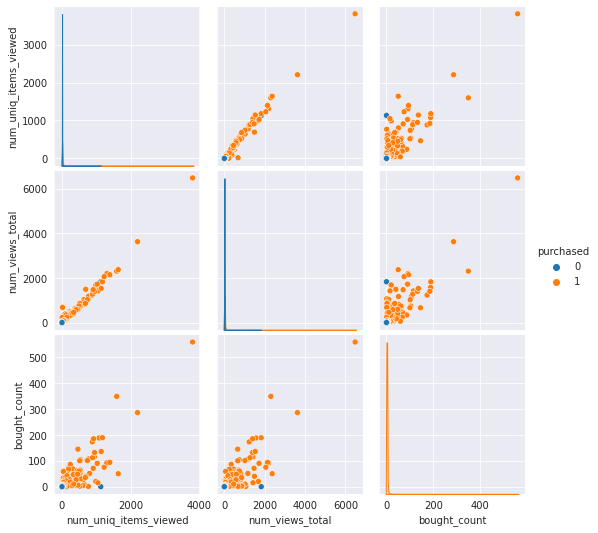

In [82]:
main_df = pd.concat([buy_visitors_df, view_visitors_df], ignore_index=True)
main_df = main_df.sample(frac=1)
sns.pairplot(main_df, x_vars = ['num_uniq_items_viewed', 'num_views_total', 'bought_count'], y_vars = ['num_uniq_items_viewed', 'num_views_total', 'bought_count'],  hue = 'purchased')


The pairplots show positive linear regression with unique items and total items viewed, which indicates that a customer that views the same item quite a lot oftem views other non unique items. 

There is a strong correlation between unique item viewed and items bought. This means that the dataset follows correct logic, as more times the customers view something, the higher the chances they will eventually buy the item.


## Customer Segmentation 

"Customer segmentation is an effective strategy to target your marketing efforts. Segmentation is the practise of splitting your market into groups of clients depending on criteria, allowing you to send them targeted messages that address their specific needs." (Malali, 2022)

- Segmenting customers by the volume of views.

- This will segment customers into groups who spend a long time viewing items, and customers who spend little time.

- This will result in recommendations RetailRocket could implement, for example: if a group of customers spend a long time viewing items, then you could send online catalogs with recommended items to influence their desicion and secure the sale. 

- Also for people who spend little time viewing the item because they know what they want, a tactic RetailRocket could implement could be to recommend that group of customers special deals which results in them spending more money.


## Segmenting based off views

In [6]:
item_tra=events[['visitorid','itemid','timestamp']][events['event']=='transaction']
item_atc=events[['visitorid','itemid','timestamp']][events['event']=='addtocart']
item_viw=events[['visitorid','itemid','timestamp']][events['event']=='view']

In [7]:
m=item_tra.merge(item_atc, how='inner', on=['visitorid','itemid'], suffixes=[' (transaction)', ' (add_to_cart)'])
m=m.merge(item_viw, how='inner', on=['visitorid','itemid'])
m=m.rename(columns={'timestamp':'timestamp (view)'})

In [8]:
m['timestamp (transaction)']=pd.to_datetime(m['timestamp (transaction)'])
m['timestamp (add_to_cart)']=pd.to_datetime(m['timestamp (add_to_cart)'])
m['timestamp (view)']=pd.to_datetime(m['timestamp (view)'])

In [9]:
msk=(m['timestamp (transaction)']-m['timestamp (view)'])>np.timedelta64(0,'m')
m1=m[msk]

In [11]:
# Seperate multiple-view transaction and single-view transaction

# Using duplicated function
mul_viw=m1.duplicated(subset=['visitorid','itemid'], keep=False)
sig_viw=m1[~mul_viw]
mul_viw=m1[mul_viw]

# Last occurrence in duplicates = view when a visitor made purchase
# Therefore, filter dataframe to leave only views before last occurence
notlast=mul_viw.duplicated(subset=['visitorid','itemid'], keep='last')  # except for last occurance

# Count the number of view
# Obtain the average number of it
avg_viw=mul_viw[notlast].groupby(['visitorid','itemid']).count()['timestamp (view)'].mean()
print('The amount of time the customer viewed before a purchase: {0:.0f}'.format(avg_viw))

The amount of time the customer viewed before a purchase: 4


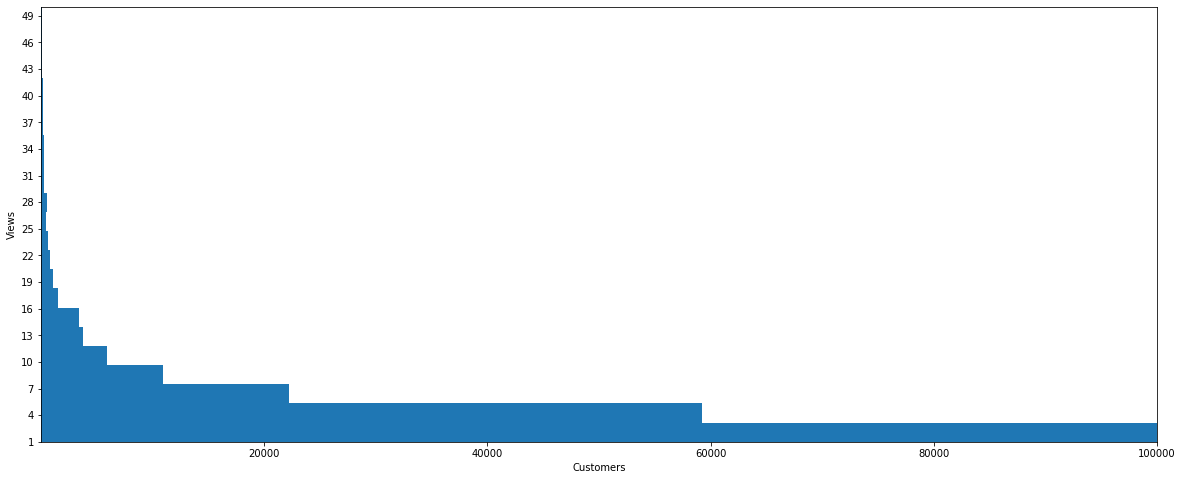

In [12]:
# Histogram to support how many times each customer has viewed an item
x= events[events.event=="view"].visitorid.value_counts()
plt.figure(1 , figsize = (20 , 8))
plt.ylabel('Views')
plt.xlabel('Customers')
plt.hist(x, bins=3000, orientation="horizontal")
plt.ylim([1, 50])
plt.xlim([1, 100000])
plt.yticks(np.arange(1, 50, 3))
plt.show()

From the analysis the amount of views the customer makes before making a purchase is 4. This is supported in the graph above as we can see a large amount of segmented customers who view an item within the ranges of 4 and 7. 

# Subtask3: Build a shopping recommender system. 

## Collaborative Filtering

Content based filtering was not used as we only know the item_id. Content based filtering needs more content, which we don't have access to as the dataset holds hashed values to protect sensitive information.

"Collaborative filtering recommendation approach is one of the most successful and widely used recommendation techniques. It makes predictions about a user’s ratings by collecting interests from many similar users. The philosophy behind collaborative filtering relies on the assumption that users who have had similar interests in the past are likely to share common interests in the future" (Cheng, Yin, Dong and Zhang, 2016)

In [91]:
# Creating a list that will hold the list of each customers bought items
purchased_items = []
    

for customer in purchased_customers:

   # Now we append each item a customer has bought in to the list 
    
    purchased_items.append(list(events.loc[(events.visitorid == customer) & (events.transactionid.notnull())].itemid.values))            

In [92]:
def recommender(item_id, purchased_items):
    
    # For that item id, perform a binary search in the list of arrays.
    # Then, make a new list with the arrays containing that item id.
    # After that, combine all of the entries in that list and remove any duplicates.
    recommender_list = []
    for x in purchased_items:
        if item_id in x:
            recommender_list += x
    
    # Combine the recommender list and get rid of the item id
    recommender_list = list(set(recommender_list) - set([item_id]))
    
    return recommender_list

In [93]:
purchased_items

[[356475],
 [15335,
  380775,
  237753,
  317178,
  12836,
  400969,
  105792,
  25353,
  200793,
  80582,
  302422],
 [81345],
 [150318, 49521],
 [310791, 299044],
 [54058,
  284871,
  251130,
  268335,
  183049,
  261940,
  369093,
  370745,
  192990,
  277119,
  241716,
  283766,
  16417,
  217068,
  36372,
  68923,
  428015,
  69533,
  13520,
  385638,
  442871,
  136526,
  247862,
  93828,
  230911,
  382595,
  34853,
  216260,
  154812,
  445241,
  57702,
  347850,
  151855,
  226327,
  288525,
  51354,
  345994,
  170438,
  254301,
  266439,
  193718,
  388558,
  26745,
  184086,
  79956,
  252040,
  82232,
  309821,
  394518,
  462070,
  331980,
  353111,
  200527,
  235933,
  68532,
  358882,
  60012,
  29741,
  270487,
  163689,
  6913,
  156457,
  341578,
  163352,
  234493,
  135174,
  452481,
  241755,
  56323,
  210137,
  184397,
  285202,
  198690,
  195958,
  239210,
  71640,
  189108,
  369112,
  346186,
  211207,
  134330,
  257070,
  302239,
  459480,
  57577,
  1952

In [122]:
recommender(366263, purchased_items)


[348162,
 445447,
 361483,
 377868,
 309273,
 358428,
 275487,
 45089,
 176162,
 285729,
 207907,
 228392,
 167978,
 31791,
 122931,
 110645,
 130101,
 63543,
 231482,
 51259,
 308283,
 302144,
 17478,
 110666,
 341070,
 406609,
 206930,
 210002,
 201816,
 200793,
 301147,
 212060,
 420960,
 260194,
 434277,
 373861,
 122984,
 279656,
 431216,
 98422,
 45175,
 451703,
 326779,
 377981,
 109700,
 67719,
 211080,
 92300,
 415884,
 112782,
 135311,
 128146,
 46232,
 433305,
 463002,
 299164,
 322717,
 331937,
 399522,
 25762,
 37029,
 358565,
 29863,
 202920,
 168,
 431276,
 154802,
 92341,
 15543,
 237753,
 294073,
 148666,
 420028,
 345279,
 6337,
 458945,
 176323,
 164035,
 376008,
 92361,
 362697,
 79056,
 437457,
 137427,
 438484,
 12504,
 269528,
 82141,
 21728,
 114913,
 131298,
 94437,
 332005,
 318697,
 225514,
 31980,
 387318,
 321785,
 121086,
 248063,
 77055,
 176385,
 43267,
 45317,
 103686,
 198921,
 214282,
 180492,
 283916,
 266512,
 10516,
 367899,
 257308,
 411934,
 5455

Here we have made a recommender that recommends items other customers have bought with that item. For example, if a customer had had purchased a kettle, a mug, tea and sugar. Then when entering the item id for kettle, it would recommend the new customer a mug, tea and sugar based of the previous customer. This is useful as it recommends items that are likely to go together and be useful with the item the customer is considering purchasing.

In [95]:
buy_visitors_df.head()


,visitorid,num_uniq_items_viewed,num_views_total,bought_count,purchased
0,599528,2,15,1,1
1,121688,13,15,11,1
2,552148,1,1,1,1
3,102019,2,6,2,1
4,189384,7,25,2,1


In [96]:
# Here we enter a customer id in place of  "172"
import collections # for removing duplicate values from array
items_bought= list(events[events.visitorid==172].itemid.unique())



allitems= []
# We will then create a loop that runs the length of the items_bought list
for x in range(len(items_bought)):
  # And for each of the items it will call a function used previously
    allitems += recommender(items_bought[x], purchased_items)



print([itemy for itemy, count in collections.Counter(allitems).items() if count >= 3])

[63543, 231482, 118914, 112782, 37029, 284871, 266439, 186702, 442725, 35202, 268883, 248455, 338660, 213834, 445351, 119736, 56323, 11279, 228392, 17478, 210002, 408737, 29863, 167126, 214271, 384302, 249247, 382419, 450082, 321089, 9877, 355994, 325310, 429765, 85774, 442131, 465522, 234255]


# Apriori algorithm

"This approach helps to know what we need to purchase or tell the suggestions of our need. Many companies such as Amazon use this approach on the e-commerce platform when we try to purchase an item. When e-shopping, the platform will give suggestions that we may buy together. It predicts other customers who frequently buy things together and also allows to know the prediction of things in multiple approaches" (EDUCBA, 2022). 


- Assiciation rule learning to discover rules that aligns items together

In [97]:
# We first create an array that lists visitors who made a purchase
customer_purchased = events[events.transactionid.notnull()].visitorid.unique()
    
purchased_items = []
    
# We then create another list that contains all their purchases 
for customer in customer_purchased:

    # Generate a Pandas series type object that contains all the visitor's purchases and put them in the list
    purchased_items.append(list(events.loc[(events.visitorid == customer) & (events.transactionid.notnull())].itemid.values))    


In [98]:
pip install mlxtend  


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.3 MB 12.2 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [99]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [100]:
te = TransactionEncoder()
te_ary = te.fit(purchased_items).transform(purchased_items)
df_pi = pd.DataFrame(te_ary, columns=te.columns_)
df_pi.shape

(11719, 12025)

In [101]:
df_pi.head()


,15,19,25,42,147,168,199,212,233,304,...,466319,466321,466342,466443,466464,466526,466603,466614,466710,466861
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [102]:
# This returns the support value for each itemset, this is useful to be able to create rules later on
frq_items = apriori(df_pi, min_support=0.001)
frq_items.head()


,support,itemsets
0,0.001707,(14)
1,0.003925,(185)
2,0.001792,(244)
3,0.001451,(264)
4,0.001024,(299)


In [103]:
# We define a dataframe with the rules we've found
rules = association_rules(frq_items, metric="confidence", min_threshold=0.01)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(11484),(5436),0.003584,0.006827,0.003072,0.857143,125.560714,0.003047,6.952214
1,(5436),(11484),0.006827,0.003584,0.003072,0.450000,125.560714,0.003047,1.811666


The algorithm has found a strong link between items 11484 and 5436

# Light FM

What is a hybrid recommender?
"A hybrid recommender is a special kind of recommender that uses both collaborative and content based filtering for making recommendations. Thats make hybrid recommender a very speacial and useful method for building recommendation system." (Kaggle, 2019)

What is LightFM? 
"LightFM is a hybrid matrix factorisation model representing users and items as linear combinations of their content features’ latent factors. The model outperforms both collaborative and content-based models in cold-start or sparse interaction data scenarios (using both user and item metadata), and performs at least as well as a pure collaborative matrix factorisation model where interaction data is abundant." (Kaggle, 2019)

In [104]:
!pip install lightfm
from lightfm import LightFM
from lightfm.evaluation import auc_score, precision_at_k

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [105]:
# Using 80/20 split as its the most common
split_point = np.int(np.round(events.shape[0]*0.8))
events_train = events.iloc[0:split_point]
events_test = events.iloc[split_point::]
events_test = events_test[(events_test['visitorid'].isin(events_train['visitorid'])) & (events_test['itemid'].isin(events_train['itemid']))]

In [106]:
from sklearn import preprocessing


In [107]:
id_cols=['visitorid','itemid']
trans_cat_train=dict()
trans_cat_test=dict()

for k in id_cols:
    cate_enc=preprocessing.LabelEncoder()
    trans_cat_train[k]=cate_enc.fit_transform(events_train[k].values)
    trans_cat_test[k]=cate_enc.transform(events_test[k].values)

In [108]:
id_cols=['visitorid','itemid']
trans_cat_train=dict()
trans_cat_test=dict()

for k in id_cols:
    cate_enc=preprocessing.LabelEncoder()
    trans_cat_train[k]=cate_enc.fit_transform(events_train[k].values)
    trans_cat_test[k]=cate_enc.transform(events_test[k].values)

In [109]:
ratings = dict()
# Here we generate the ratings for each user-item interaction pair
cate_enc=preprocessing.LabelEncoder()
ratings['train'] = cate_enc.fit_transform(events_train.event)
ratings['test'] = cate_enc.transform(events_test.event)

In [110]:
n_users=len(np.unique(trans_cat_train['visitorid']))
n_items=len(np.unique(trans_cat_train['itemid']))


In [111]:
from scipy.sparse import coo_matrix

In [112]:
# Here we create the rating spare matrix using both the test and train ratings 
rate_matrix = dict()
rate_matrix['train'] = coo_matrix((ratings['train'], (trans_cat_train['visitorid'], trans_cat_train['itemid'])), shape=(n_users,n_items))
rate_matrix['test'] = coo_matrix((ratings['test'], (trans_cat_test['visitorid'], trans_cat_test['itemid'])), shape=(n_users,n_items))

In [113]:
# Here we use warp loss function provided in the LightFM library
# WARP deals with (user, positive item, negative item) triplets
# It maximises the rank of positive examples by repeatedly sampling negative examples until rank violating one is found
# This is useful when only positive interactions are present and optimising the top of the recommendation
model = LightFM(no_components=5, loss='warp')
model.fit(rate_matrix['train'], epochs=100, num_threads=8)

In [114]:
# Now we will get a recommendation from the model

df = events[['itemid']]
items = df.to_numpy()
def sample_recommendation(model, data, user_ids):

    # This will show number of users and items within the training data
    n_users, n_items = data.shape

    # This will then generate recommendations for each user we input
    for user_id in user_ids:

        # This will then predict items in our model that they will like
        scores = model.predict(user_id, np.arange(n_items))

        # This will then rank these items in order of most liked to least
        top_items = items[np.argsort(-scores)][:3]

        print(top_items)

sample_recommendation(model, rate_matrix['train'], [1])

[[282468]
 [177152]
 [416851]]


# Subtask 4: Evaluate the recommender system
- Evaluating using AUC and Precision at K

## Hybrid Recommender

### Area Under the Curve (AUC)

"AUC - ROC curve is a performance measurement for the classification problems at various threshold settings. ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes. Higher the AUC, the better the model is at predicting 0 classes as 0 and 1 classes as 1." (Narkhede, 2018)

In [121]:
auc_train = auc_score(model, rate_matrix['train'], num_threads=8).mean()
auc_test = auc_score(model, rate_matrix['test'], num_threads=8).mean()

print("Train AUC %.3f\n"%auc_train)
print("Test AUC %.3f\n"%auc_test)

Train AUC 0.986

Test AUC 0.762



The greater the AUC, the better a classifier performs for the given task.  The train and test are very high which indicates a successful model of items being purchased by a user

### Precision at K

"Precision at k is the proportion of recommended items in the top-k set that are relevant" (Malaeb, 2017) 

In [119]:
precision_at_k_train = precision_at_k(model, rate_matrix['train'], k = 3, num_threads=8).mean()
precision_at_k_test = precision_at_k(model, rate_matrix['test'], k = 3, num_threads=8).mean()

In [120]:
print("Train precision@k %.3f\n"%precision_at_k_train)
print("Test precision@k %.3f\n"%precision_at_k_test)

Train precision@k 0.008

Test precision@k 0.004



Where the reccomendation score could be negative, it has effected the precision K as we are calculating the average. As a result, the train and test are quite low. This isnt the biggest of issues due to the AUC being very successfull. 

# Conclusion

Throughout this exercise, we were able to able to explore and complete:

- Subtask 1: Data exploration, pre-processing and visualisation.
- Subtask 2: Customer behaviour analysis. Customer segmentation. 
- Subtask 3: Build a shopping recommender system.
- Subtask 4: Evaluate the recommender system that you have implemented using metrics such as precision and Area Under the Curve (AUC).

Although we didnt follow the given template, we think the document has a good flow and is easily understood. Each task presented its issues but were eventually understood and fixed. The tasks for progressively harder, but working together we were able to research and use the tutorials to help compelte each task.

- Task 5 will be in a word document within the .zip

# References

Apichottanakul, A. (2021) Customer Behaviour Analysis Based on Buying-data Sparsity For Multi-category Products in Pork Industry: A Hybrid Approach. Taylor & Francis Online [online]. 8 (1)

Bayar, E (2020). Apriori Association Rules | Grocery Store. [online]. Available from: https://www.kaggle.com/code/ekrembayar/apriori-association-rules-grocery-store
[Accessed 29 April 2022]

Brownlee, J. (2020) Data Preparation For Machine Learning: Data Cleaning, Feature Selection, and Data Transforms in Python [online]. : Machine Learning Mastery,. [Accessed 06 July 2022].
https://books.google.co.uk/books?hl=en&lr=&id=uAPuDwAAQBAJ&oi=fnd&pg=PP1&dq=python+data+cleaning&ots=Cl4NuggMqW&sig=XHIEtV9nNUJWzWsRyoodJK9wk34&redir_esc=y#v=onepage&q&f=false

Cheng, W., Yin, G., Dong, Y. and Zhang, W. (2016) Collaborative Filtering Recommendation on Users’ Interest Sequences. Plos One [online]. 11 (5) [Accessed 01 May 2022].

EDUCBA (2022) Apriori Algorithm. Available from: https://www.educba.com/apriori-algorithm/ [Accessed 01 May 2022] 

Johnson, W.P. and Myatt, G.J. (2009) Making Sense of Data Ii: A Practical Guide to Data Visualization, Advanced Data Mining Methods, and Applications [online]. : John Wiley & Sons. [Accessed 06 July 2022].
https://books.google.co.uk/books?id=lFBqIpM-vuQC&dq=data+visualization+data+mining&lr=&source=gbs_navlinks_s

Kaggle (2019) LightFM Hybrid Recommendation system. Available from: https://www.kaggle.com/code/niyamatalmass/lightfm-hybrid-recommendation-system/notebook [Accessed 01 May 2022]

Malali, S (2022) Customer Segmentation: Explained. Available from: https://www.slintel.com/blog/customer-segmentation/

Malaeb, M (2017) Recall and Precision at k for Recommender System. Available from: https://medium.com/@m_n_malaeb/recall-and-precision-at-k-for-recommender-systems-618483226c54 [Accessed 01 May 2022] 

Narkhede (2018) Understanding AUC – ROC curve. Available from: https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5 [Accessed 01 May 2022]

SaleCycle (2022). Ecommerce & Trends Stats Report. [online]. SaleCycle. Available from: https://d34w0339mx0ifp.cloudfront.net/content/2022%20Ecommerce%20Report%20Compv2.pdf [Accessed 04 May 2022]

Son, J. and Kim, S.B. (2017) Content-based Filtering For Recommendation Systems Using Multiattribute Networks. Expert Systems with Applications [online]. 89, pp. 404-412. [Accessed 01 May 2022].






